## Curve fiting of proteins by dose 

In [2]:
#
library(ggplot2)

#install.packages("drc", dependencies = TRUE)

#devtools::install_github("jessica-ewald/fastbmdR")
library(fastbmdR)
library(dplyr)
library(knitr)

In [3]:
df <- read.csv("./outputs/cluster_proportions.csv", sep= ',')


In [ ]:
## computing the BMD for the proteiomic data

models <- c("Exp2", "Exp3", "Exp4", "Exp5", "Poly2", "Lin", "Power", "Hill")

ncpus <- 1  

unique_compounds <- unique(df$Metadata_Compound)

feat_cols = colnames(df)[!grepl("Metadata", colnames(df))]
res = list()
gene_table <- list()

all_bmd_pass <- data.frame()

for (compound in unique_compounds) {
  
  compound_data <- df[df$Metadata_Compound %in% c(compound, "DMSO"), ]
  
  dose <- compound_data$Metadata_Concentration
  dose_log <- dose
  dose_log[dose_log > 0] <- log10(dose_log[dose_log > 0])
  
  rank_dose = unique(dose) %>% sort(. , decreasing = TRUE)
  dose_spacing = abs(log10(rank_dose[2]/rank_dose[1]))
  
  dose_shift = abs(min(dose_log)) + dose_spacing
  dose_shifted = dose_log
  dose_shifted[dose_shifted != 0] = dose_shifted[dose_shifted != 0] + dose_shift
  
  if (length(unique(compound_data$Metadata_Concentration)) > 2) {  
    
    print(paste("Processing compound:", compound))  
    dose <- dose_shifted
    
    compound_mat <- t(compound_data[, feat_cols])  
    min_val <- abs(min(compound_mat, na.rm=TRUE))  
    add_min <- min_val + 0.1 * min_val  
    mat_new <- compound_mat + add_min  
    
    if (length(dose) == ncol(mat_new)) {  
      tryCatch({
        fit_obj <- PerformCurveFitting(data = mat_new, dose = dose, ncpus = ncpus, models = models)
        fit_obj <- FilterDRFit(fit_obj, lof.pval = 0.1, filt.var = "AIC.model")
        fit_obj <- PerformBMDCalc(fit_obj, ncpus = ncpus, num.sds = 2, bmr.method = "sample.mean", log10.dose = TRUE)
        
        bmd_res <- fit_obj$bmd_res
        bmd_pass <- bmd_res[bmd_res$all.pass, ]
        fit_obj$bmd_pass <- bmd_pass

        res[[compound]] <- fit_obj
        
        if (nrow(bmd_pass) > 0) {
          bmd_pass$compound_name <- compound
          all_bmd_pass <- rbind(all_bmd_pass, bmd_pass) 
        }
      }, error = function(e) {
        print(paste("Error with compound:", compound, "- ignoring this compound"))
      })
    }
  }  
}

[1] "Processing compound: Actinomycin D"
[1] "Processing compound: Bevirimat"
[1] "Processing compound: Ethoxyquin"
[1] "Processing compound: Amperozide"
[1] "Processing compound: IOPANOIC ACID"


[1] "Processing compound: DMSO"
[1] "Compos<U+00E9> ignor<U+00E9>: DMSO - moins de 2 doses r<U+00E9>elles hors DMSO"
[1] "Processing compound: Celecoxib"
[1] "mat_new: 6 x 97 | dose length: 97"
[1] "Plot of  Celecoxib - SampleID"
[1] "<U+26D4> Error for Celecoxib / SampleID : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Celecoxib - Compound"
[1] "<U+26D4> Error for Celecoxib / Compound : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Celecoxib - Replicate"
[1] "<U+26D4> Error for Celecoxib / Replicate : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Celecoxib - Concentration"
[1] "<U+26D4> Error for Celecoxib / Concentration : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Celecoxib - Cluster.0"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


[1] "Plot of  Celecoxib - Cluster.1"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


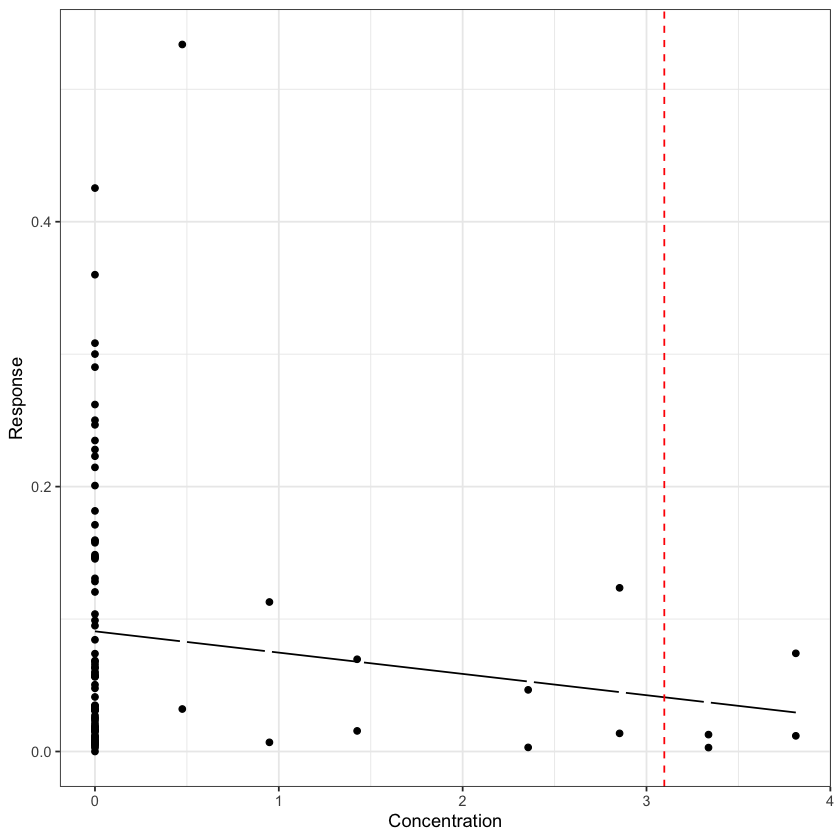

[1] "Plot of  Celecoxib - Cluster.2"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


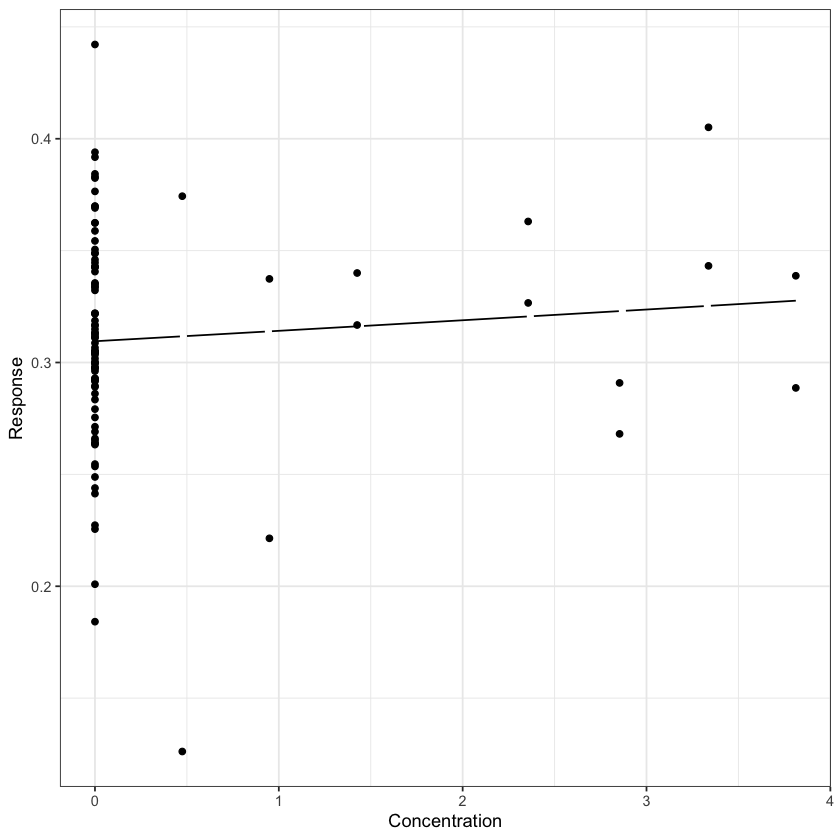

[1] "Plot of  Celecoxib - Cluster.3"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


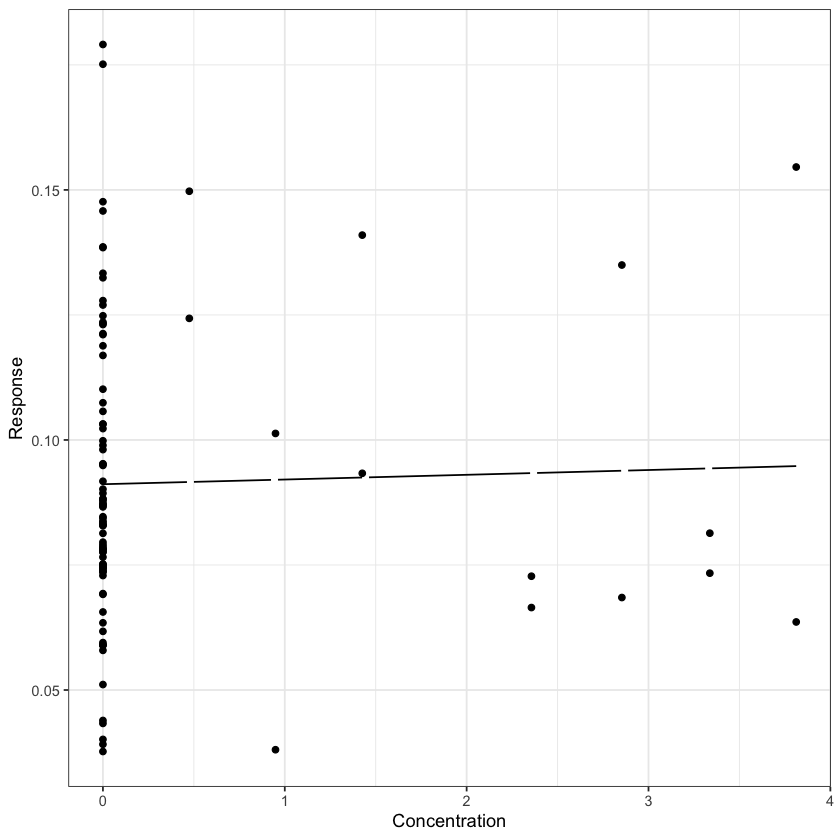

[1] "Plot of  Celecoxib - Cluster.4"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


[1] "Plot of  Celecoxib - Cluster.5"
[1] "<U+26D4> Error for Celecoxib / Cluster.5 : EXPR doit ^etre un vecteur de longueur 1"
[1] "Processing compound: Ketoprofen"
[1] "mat_new: 6 x 97 | dose length: 97"


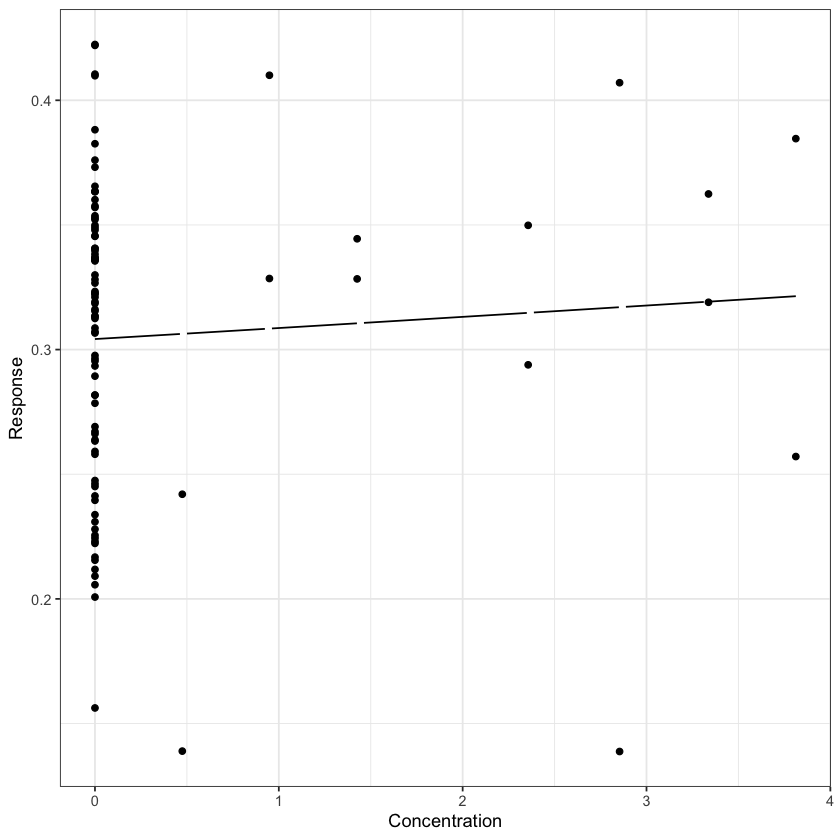

[1] "Plot of  Ketoprofen - SampleID"
[1] "<U+26D4> Error for Ketoprofen / SampleID : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Ketoprofen - Compound"
[1] "<U+26D4> Error for Ketoprofen / Compound : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Ketoprofen - Replicate"
[1] "<U+26D4> Error for Ketoprofen / Replicate : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Ketoprofen - Concentration"
[1] "<U+26D4> Error for Ketoprofen / Concentration : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Ketoprofen - Cluster.0"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


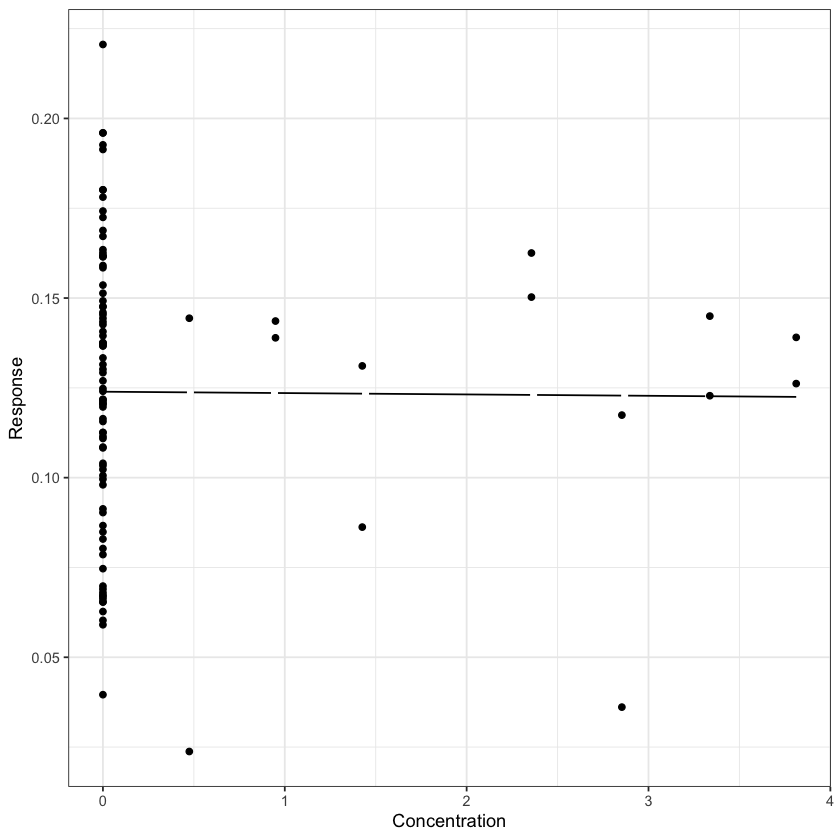

[1] "Plot of  Ketoprofen - Cluster.1"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


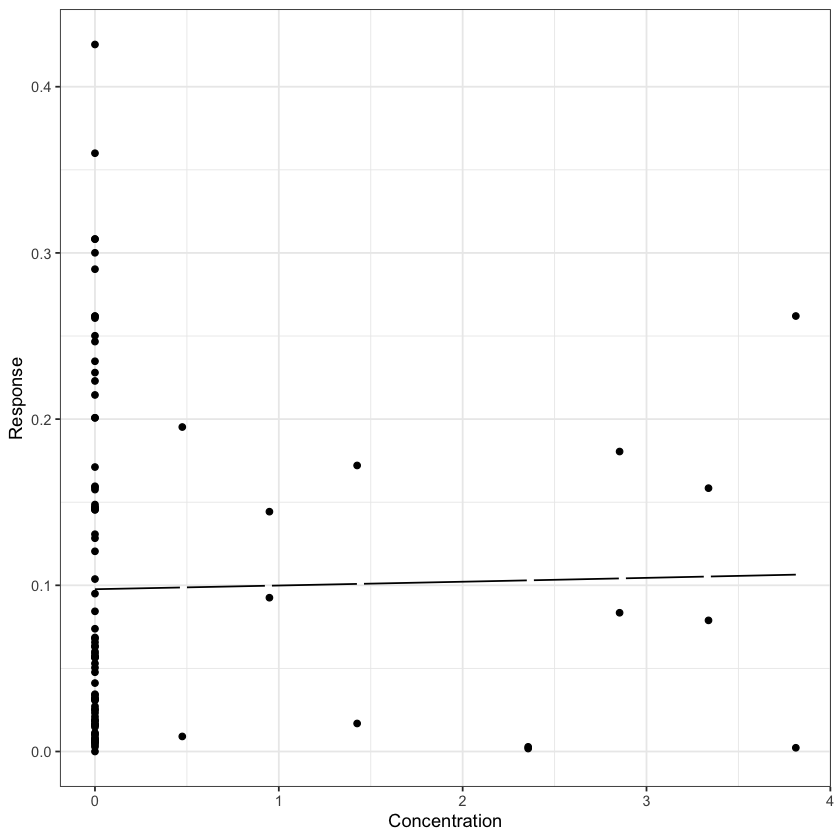

[1] "Plot of  Ketoprofen - Cluster.2"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


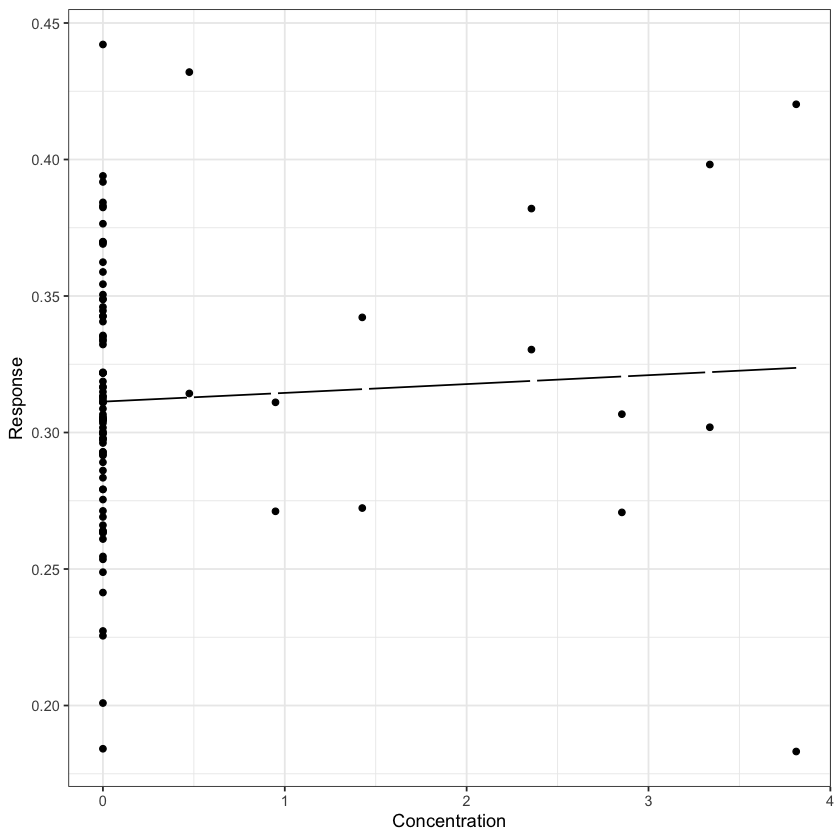

[1] "Plot of  Ketoprofen - Cluster.3"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


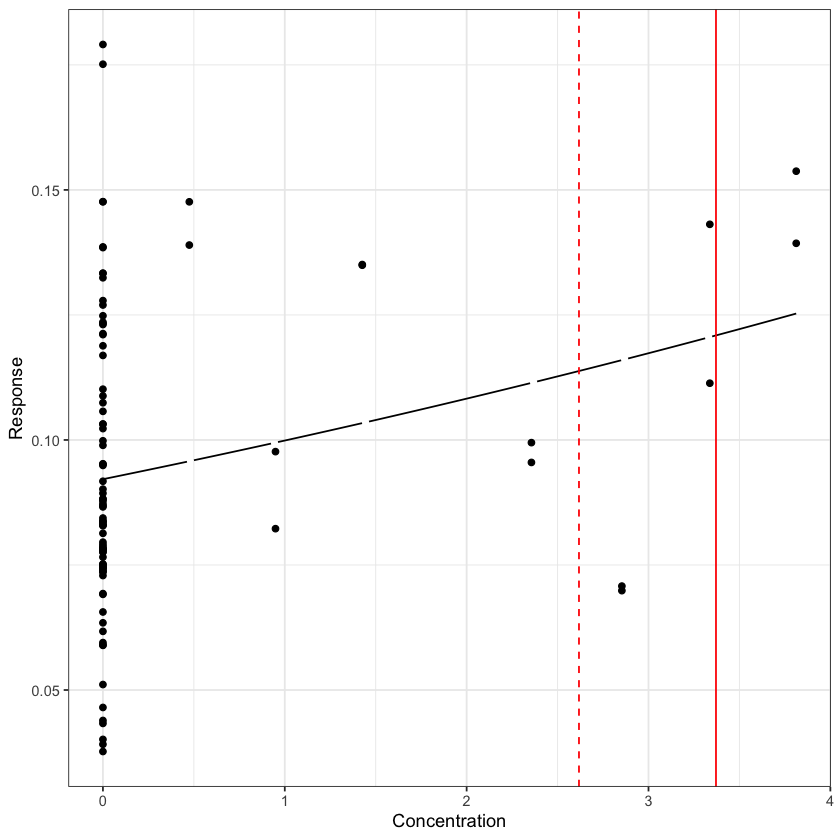

[1] "Plot of  Ketoprofen - Cluster.4"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


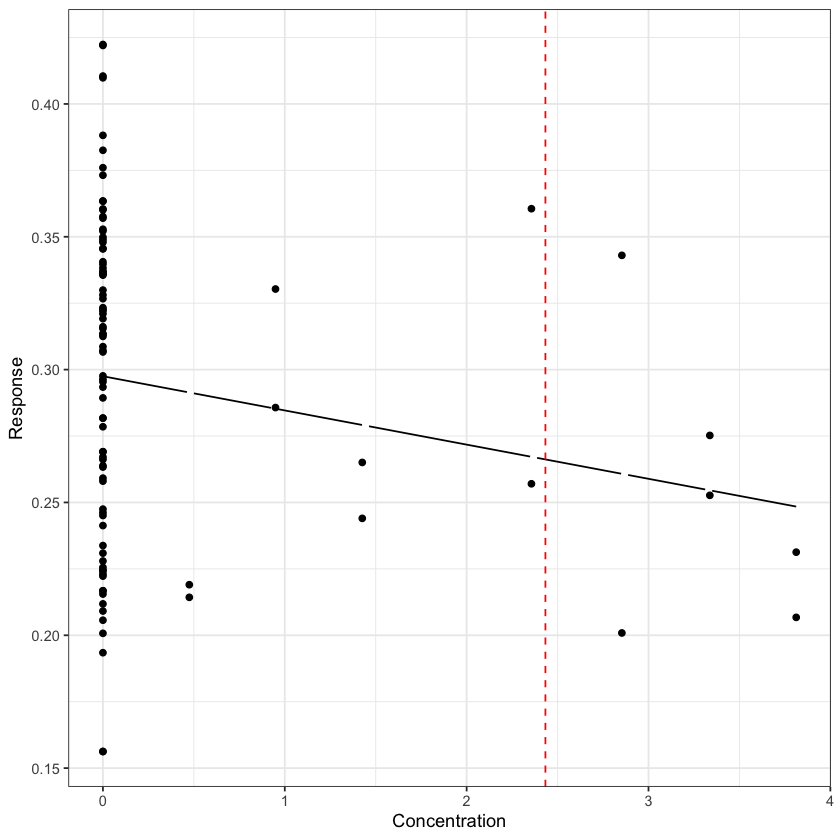

[1] "Plot of  Ketoprofen - Cluster.5"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


[1] "Processing compound: Mefenamic acid"
[1] "mat_new: 6 x 97 | dose length: 97"


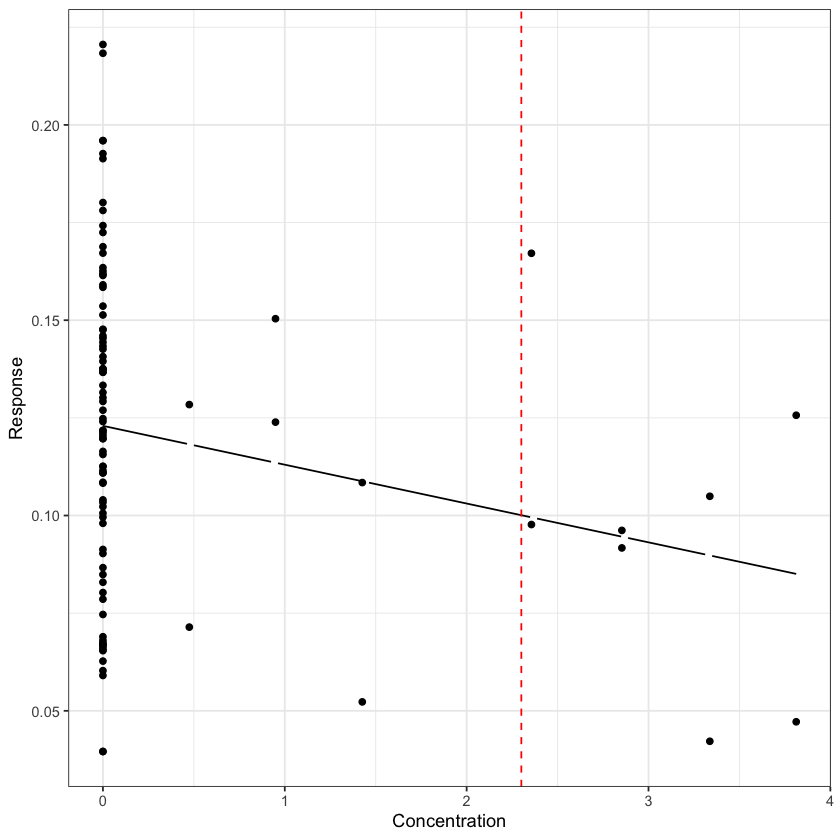

[1] "Plot of  Mefenamic acid - SampleID"
[1] "<U+26D4> Error for Mefenamic acid / SampleID : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Mefenamic acid - Compound"
[1] "<U+26D4> Error for Mefenamic acid / Compound : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Mefenamic acid - Replicate"
[1] "<U+26D4> Error for Mefenamic acid / Replicate : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Mefenamic acid - Concentration"
[1] "<U+26D4> Error for Mefenamic acid / Concentration : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Mefenamic acid - Cluster.0"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


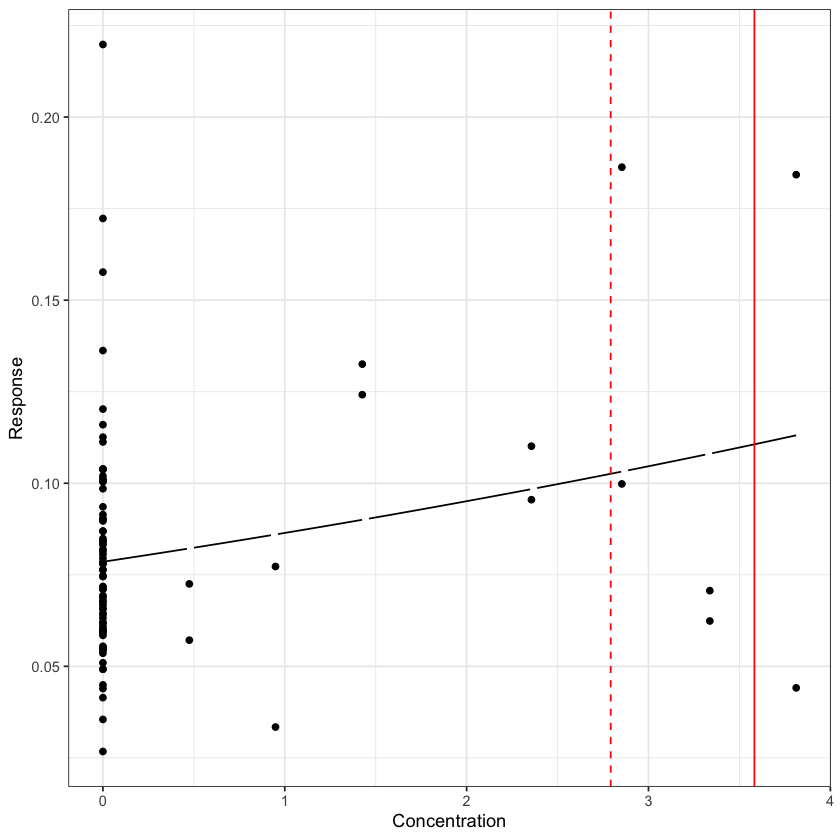

[1] "Plot of  Mefenamic acid - Cluster.1"
[1] "<U+26D4> Error for Mefenamic acid / Cluster.1 : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Mefenamic acid - Cluster.2"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


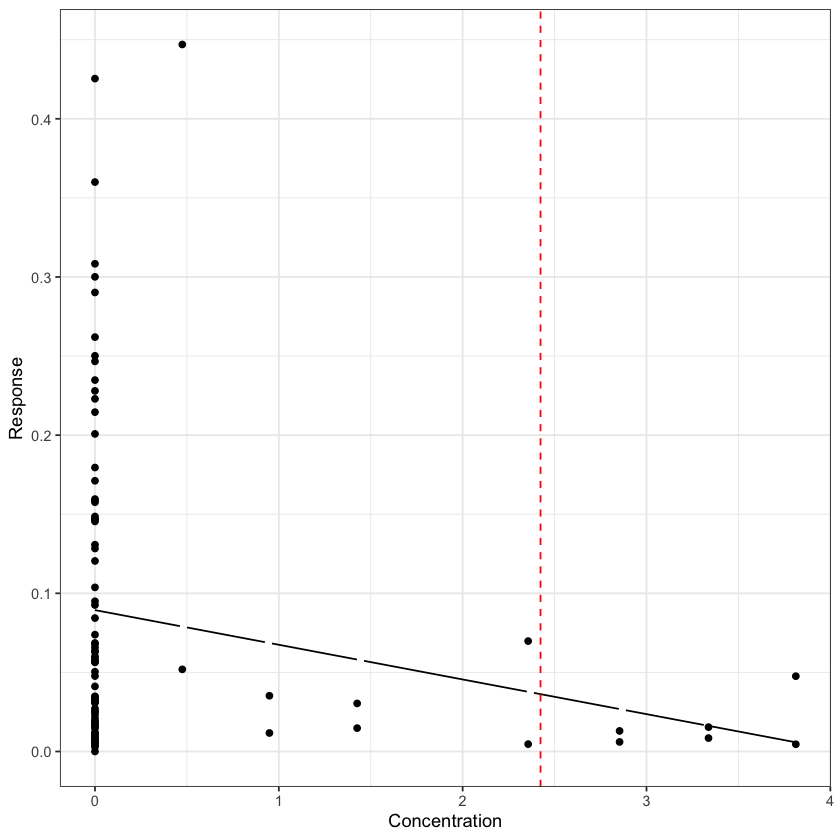

[1] "Plot of  Mefenamic acid - Cluster.3"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


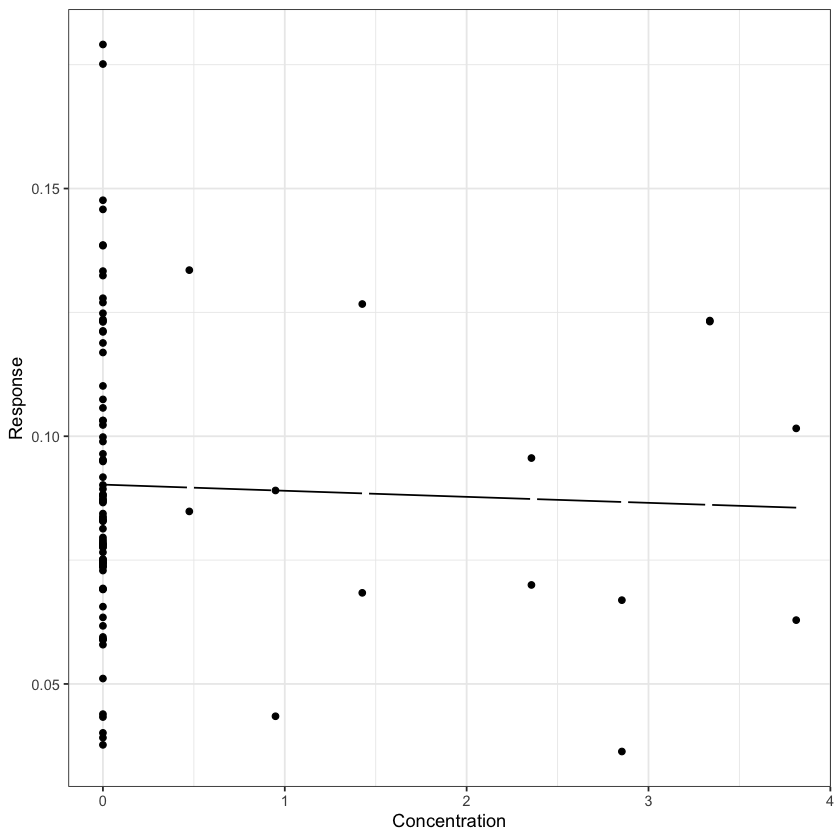

[1] "Plot of  Mefenamic acid - Cluster.4"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


[1] "Plot of  Mefenamic acid - Cluster.5"
[1] "<U+26D4> Error for Mefenamic acid / Cluster.5 : EXPR doit ^etre un vecteur de longueur 1"
[1] "Processing compound: Lumiracoxib"
[1] "mat_new: 6 x 96 | dose length: 96"


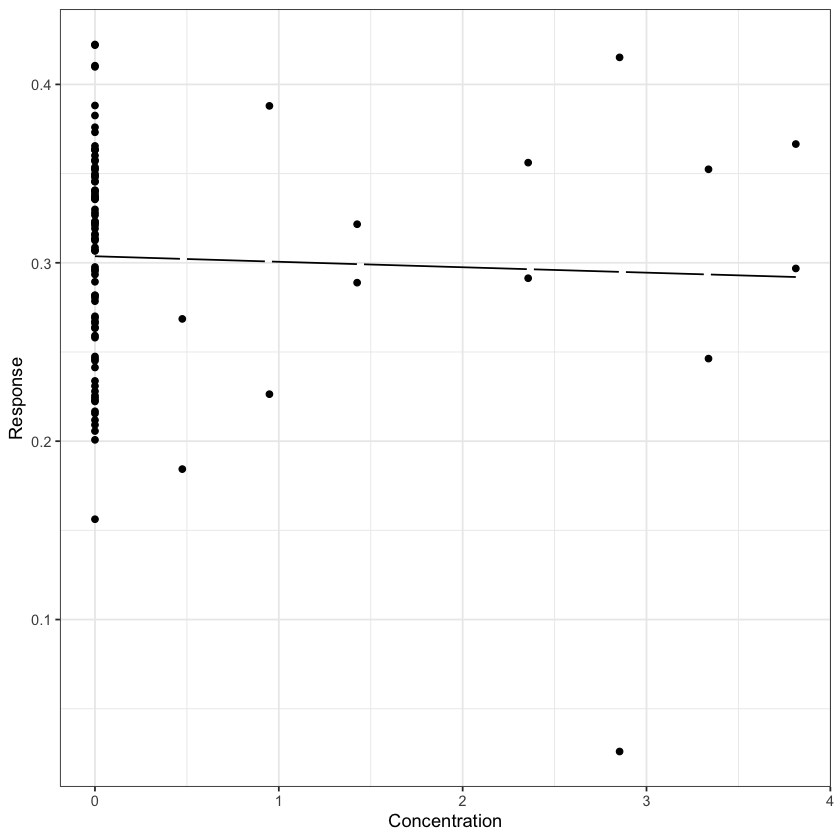

[1] "Plot of  Lumiracoxib - SampleID"
[1] "<U+26D4> Error for Lumiracoxib / SampleID : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Lumiracoxib - Compound"
[1] "<U+26D4> Error for Lumiracoxib / Compound : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Lumiracoxib - Replicate"
[1] "<U+26D4> Error for Lumiracoxib / Replicate : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Lumiracoxib - Concentration"
[1] "<U+26D4> Error for Lumiracoxib / Concentration : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Lumiracoxib - Cluster.0"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


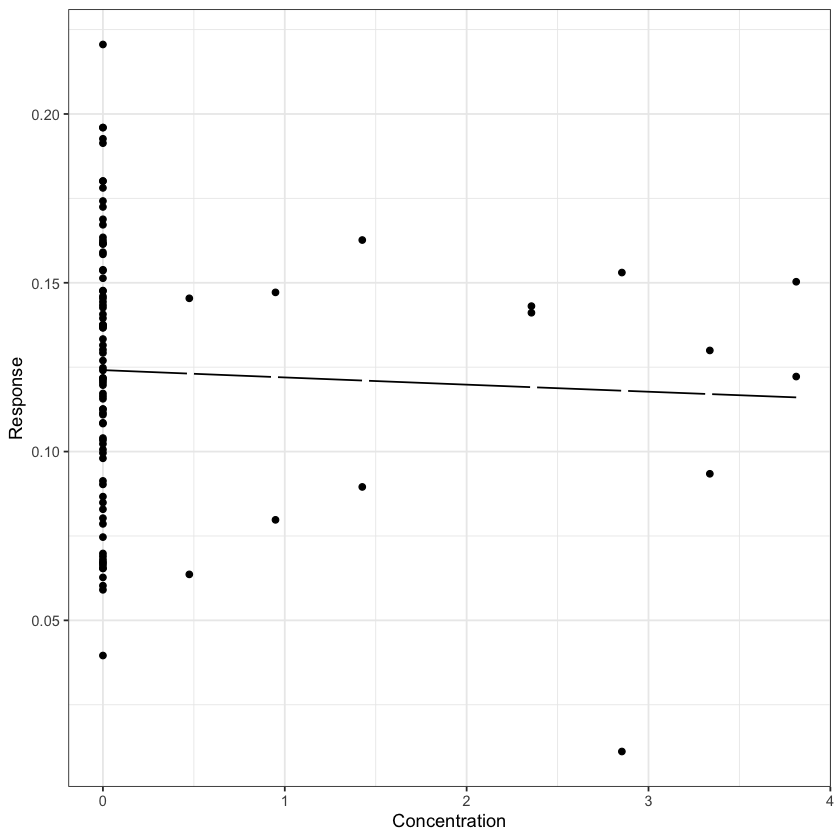

[1] "Plot of  Lumiracoxib - Cluster.1"
[1] "<U+26D4> Error for Lumiracoxib / Cluster.1 : EXPR doit ^etre un vecteur de longueur 1"
[1] "Plot of  Lumiracoxib - Cluster.2"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


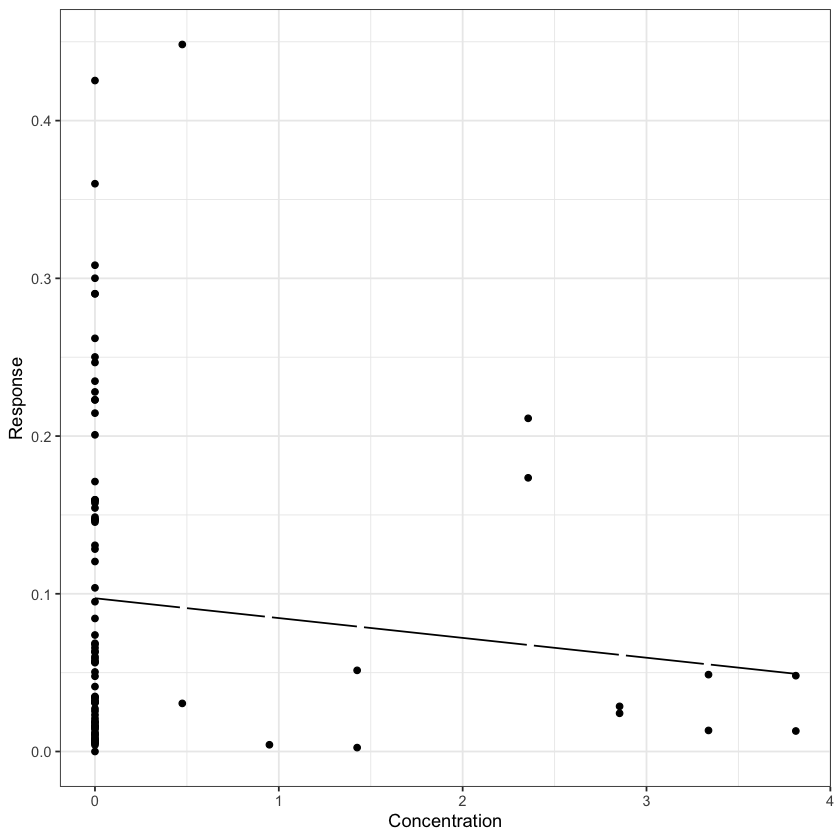

[1] "Plot of  Lumiracoxib - Cluster.3"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


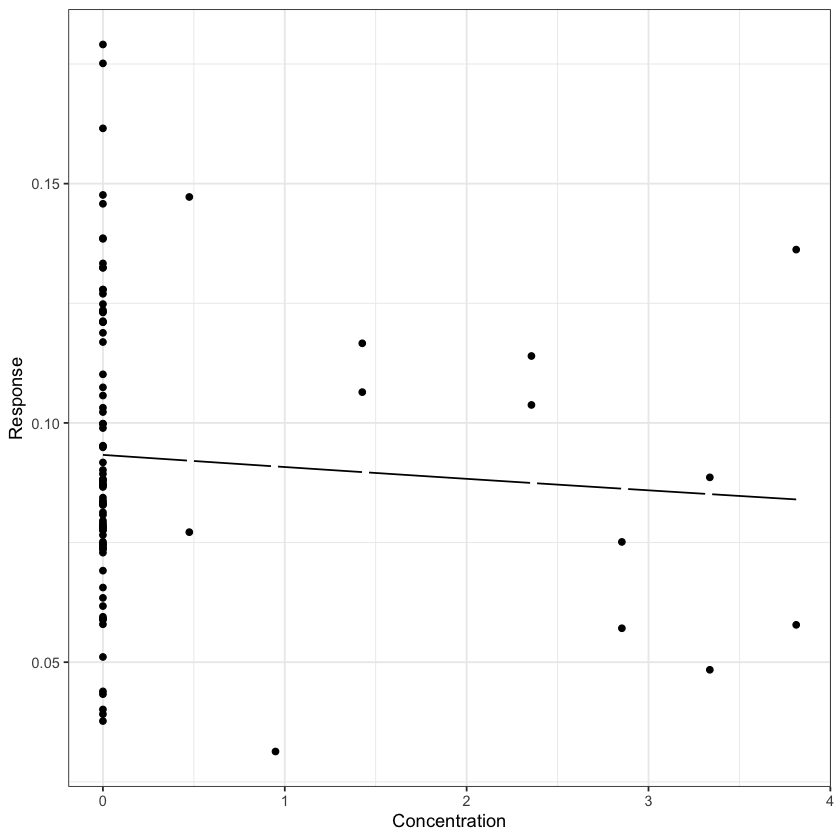

[1] "Plot of  Lumiracoxib - Cluster.4"


Warning message:
"Removed 98 rows containing missing values or values outside the scale range
(`geom_point()`)."


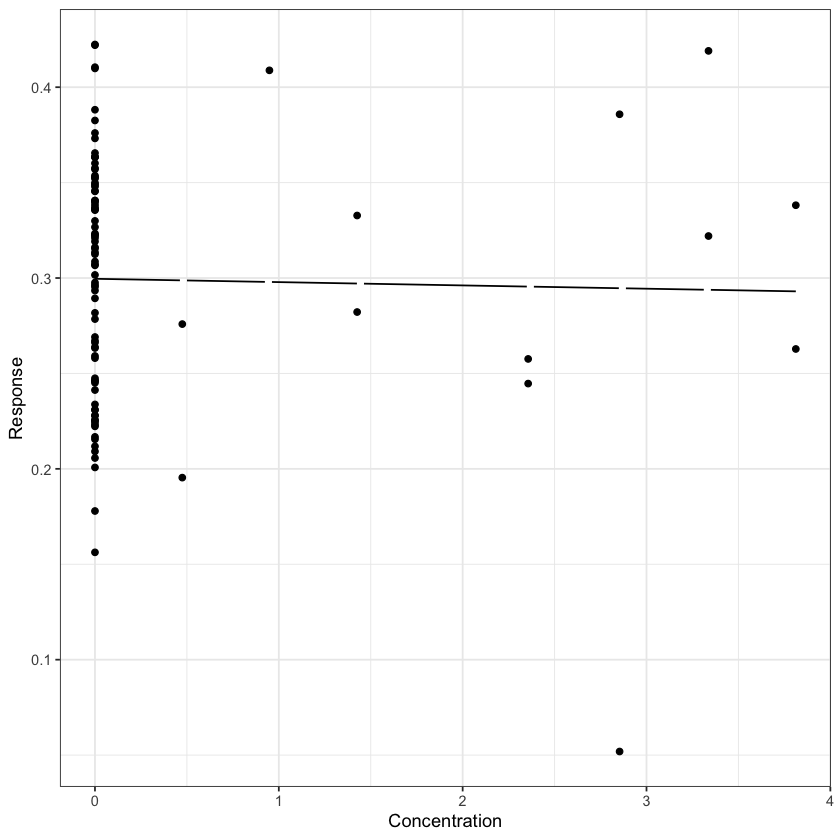

[1] "Plot of  Lumiracoxib - Cluster.5"
[1] "<U+26D4> Error for Lumiracoxib / Cluster.5 : EXPR doit ^etre un vecteur de longueur 1"


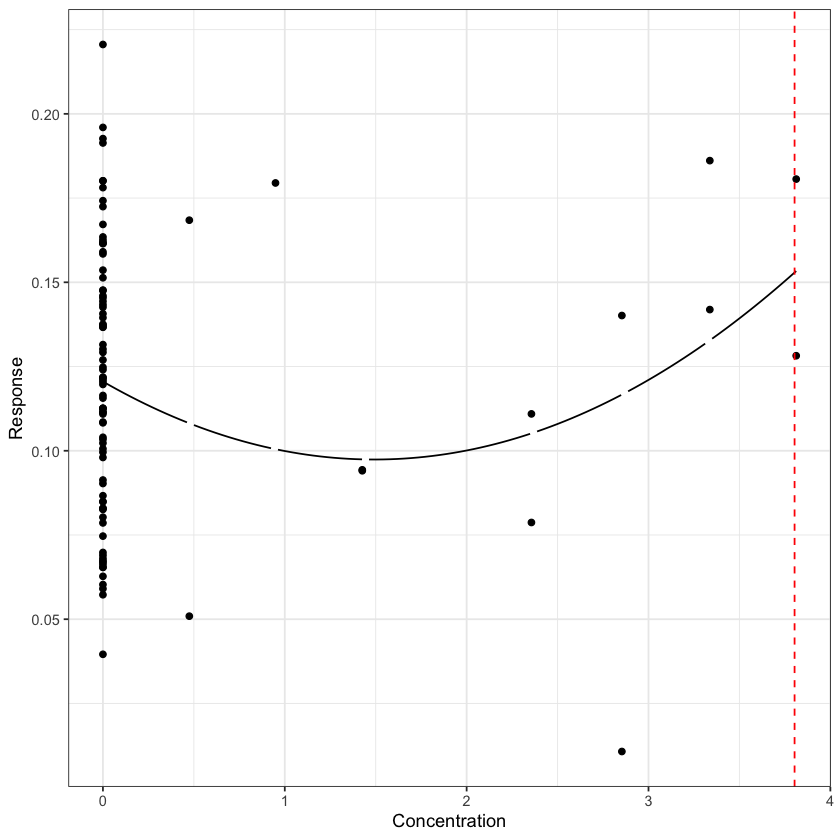

In [11]:
models <- c("Exp2", "Exp3", "Exp4", "Exp5", "Poly2", "Lin", "Power", "Hill")
ncpus <- 1  

all_results <- list()

compounds <- unique(df$Compound)
feat_cols =  c("SampleID", "Replicate", "Compound", "Concentration")

res <- list()
all_bmd_pass <- data.frame()

for (compound in compounds) {
  print(paste0("Processing compound: ", compound))

  compound_data <- df[df$Compound %in% c(compound, "DMSO"), ]
  doses <- compound_data$Concentration

  # Vérifie qu’on a au moins 3 concentrations (hors DMSO)
  real_doses <- unique(doses[doses != 0])
  if (length(real_doses) < 2) {
    print(paste("Composé ignoré:", compound, "- moins de 2 doses réelles hors DMSO"))
    next
  }

  tryCatch({
    dose_log <- doses
    dose_log[dose_log > 0] <- log10(dose_log[dose_log > 0])
    rank_dose = sort(unique(doses), decreasing = TRUE)
    dose_spacing = abs(log10(rank_dose[2]/rank_dose[1]))
    dose_shift = abs(min(dose_log)) + dose_spacing
    dose_shifted = dose_log
    dose_shifted[dose_shifted != 0] = dose_shifted[dose_shifted != 0] + dose_shift
    dose <- dose_shifted

    compound_mat <- t(compound_data[, !(names(compound_data) %in% feat_cols)])
    min_val <- abs(min(compound_mat, na.rm = TRUE))
    add_min <- min_val + 0.1 * min_val
    mat_new <- compound_mat + add_min

    print(paste("mat_new:", paste(dim(mat_new), collapse = " x "), "| dose length:", length(dose)))

    fit_obj <- PerformCurveFitting(data = mat_new, dose = dose, ncpus = ncpus, models = models)
    fit_obj <- FilterDRFit(fit_obj, lof.pval = 0.1, filt.var = "AIC.model")
    fit_obj <- PerformBMDCalc(fit_obj, ncpus = ncpus, num.sds = 1, bmr.method = "sample.mean")
    

    for (cluster in colnames(compound_data)) {
      tryCatch({
        print(paste("Plot of ", compound, "-", cluster))
        plot_bmd_curve(cluster, fit_obj)
      }, error = function(e) {
        print(paste("⛔ Error for", compound, "/", cluster, ":", e$message))
      })
    }
 
    all_results[[compound]] <- fit_obj

  }, error = function(e) {
    print(paste("Error for the compound:", compound, "-", e$message))
    all_results[[compound]] <- list(error = TRUE, message = e$message)
  })
}

In [4]:
#write.csv(all_bmd_pass, "/Users/grigoryanmariam/newproject/2025_Grigoryan_Proteomics/01.dose_response/outputs/bmd_pass_protein.csv", row.names = FALSE)


## load the BMD results

all_bmd_pass <- read.csv("./outputs/bmd_pass_protein.csv", sep = ",")

In [5]:
## calculating the bmd values at real concentration

all_bmd_pass$Concentration <- NA
all_bmd_pass$Concentration_L <- NA
all_bmd_pass$Concentration_U <- NA

for (i in 1:nrow(all_bmd_pass)) {
  compound <- all_bmd_pass$compound_name[i]
  bmd <- all_bmd_pass$bmd[i]
  bmdl <- all_bmd_pass$bmdl[i]
  bmdu <- all_bmd_pass$bmdu[i]
  
  compound_data <- df[df$Metadata_Compound == compound, ]
  dose <- compound_data$Metadata_Concentration
  
  # Transformer en log10 (en évitant les zéros)
  dose_log <- dose
  dose_log[dose_log > 0] <- log10(dose_log[dose_log > 0])
  
  rank_dose <- unique(dose)
  rank_dose <- sort(rank_dose, decreasing = TRUE)
  
  # Saut entre deux concentrations successives (log-échelle)
  if (length(rank_dose) > 1) {
    dose_spacing <- abs(log10(rank_dose[2] / rank_dose[1]))
  } else {
    dose_spacing <- 1  # Valeur arbitraire s'il n'y a qu'une concentration
  }
  
  dose_shift <- abs(min(dose_log, na.rm = TRUE)) + dose_spacing
  
  all_bmd_pass$Concentration[i] <- 10^(bmd - dose_shift)
  all_bmd_pass$Concentration_L[i] <- 10^(bmdl - dose_shift)
  all_bmd_pass$Concentration_U[i] <- 10^(bmdu - dose_shift)
}



In [7]:
# Count the frequency of each protein

library(dplyr)

compound_count_per_protein <- all_bmd_pass %>%
  group_by(gene.id) %>%
  summarise(n_compounds = n_distinct(compound_name)) %>%
  arrange(desc(n_compounds))


print(compound_count_per_protein, n = Inf)


# A tibble: 168 x 2
    gene.id  n_compounds
    <chr>          <int>
  1 Q14393            16
  2 P09341            14
  3 Q9H2A7            14
  4 P0DJI8            13
  5 Q12805            13
  6 Q15113            13
  7 Q16610            13
  8 Q9BY76            13
  9 P09237            12
 10 P13500            12
 11 P16035            12
 12 O95633            10
 13 P01033            10
 14 P09382            10
 15 P09603            10
 16 P17936            10
 17 P24592            10
 18 P36222            10
 19 P80188            10
 20 Q15582            10
 21 Q9NP84            10
 22 P14174             9
 23 P15692             9
 24 P80098             9
 25 P02778             8
 26 P07585             8
 27 O75509             7
 28 P01137             7
 29 P35613             7
 30 P49767             7
 31 Q99988             7
 32 P03956             6
 33 Q15389             6
 34 Q16663             6
 35 P08254             5
 36 P19438             5
 37 P27487             5
 38 P

In [11]:
list_plot <- list()  

for (i in 1:nrow(all_bmd_pass)) {  
  tryCatch({
    gene_id <- all_bmd_pass$gene.id[i]
    compound <- all_bmd_pass$compound_name[i]
    
    temp <- plot_bmd_curve(gene_id, res[[compound]], return_type = "plot.data")
    
    temp$protein <- gene_id
    temp$compound <- compound
    temp$category <- all_bmd_pass$Metadata_Categories[i]
    temp$bmd <- all_bmd_pass$bmd[i]
    temp$bmd_l <- all_bmd_pass$bmdl[i]
    temp$bmd_u <- all_bmd_pass$bmdu[i]
    temp$Concentration <- all_bmd_pass$Concentration[i]
    
    list_plot[[i]] <- temp
  }, error = function(e) {
    message(sprintf("Error for gene_id %s and compound %s : %s", gene_id, compound, e$message))
  })
}

final_df <- do.call(rbind, list_plot)

# Aperçu des résultats
kable(head(final_df))



|  x| Observations|       f_x|protein |compound      |      bmd|    bmd_l|   bmd_u| Concentration|
|--:|------------:|---------:|:-------|:-------------|--------:|--------:|-------:|-------------:|
|  0|    0.1879041| 0.1882725|O00175  |Actinomycin D | 4.345116| 4.243573| 4.43751|      110.6843|
|  0|    0.1960699| 0.1882725|O00175  |Actinomycin D | 4.345116| 4.243573| 4.43751|      110.6843|
|  0|    0.2082702| 0.1882725|O00175  |Actinomycin D | 4.345116| 4.243573| 4.43751|      110.6843|
|  0|    0.1722449| 0.1882725|O00175  |Actinomycin D | 4.345116| 4.243573| 4.43751|      110.6843|
|  0|    0.1719874| 0.1882725|O00175  |Actinomycin D | 4.345116| 4.243573| 4.43751|      110.6843|
|  0|    0.1936951| 0.1882725|O00175  |Actinomycin D | 4.345116| 4.243573| 4.43751|      110.6843|

In [12]:
## we now plot the bmd curves for each compound and protein and save them in a pdf file

library(ggplot2)
library(ggforce)



n_per_page <- 9  


final_df$compound_protein <- paste(final_df$compound, final_df$protein, sep = " - ")


plot_groups <- unique(final_df$compound_protein)
n_pages <- ceiling(length(plot_groups) / n_per_page)


pdf_file <- "./outputs/bmd_curves.pdf"
pdf(pdf_file, width = 15, height = 10)

for (i in 1:n_pages) {
  tryCatch({
    p <- ggplot(final_df, aes(x = x, y = Observations)) +
      geom_point(show.legend = FALSE) +
      geom_line(aes(y = f_x), show.legend = FALSE) +

      geom_vline(aes(xintercept = bmd), linetype = "solid", color = "red") +  
      geom_vline(aes(xintercept = bmd_l), linetype = "dashed", color = "red") + 
      geom_vline(aes(xintercept = bmd_u), linetype = "dashed", color = "red") +  
      facet_wrap_paginate(~ compound_protein, ncol = 3, nrow = 3, page = i, scales = "free_y") +
      
      labs(title = sprintf("BMD curves", i),
           x = "Concentration",
           y = "Observation") +
      theme_bw() +
      theme(strip.text = element_text(size = 8))
    
    print(p) 
  }, error = function(e) {
    message(sprintf("Error in the page %d : %s", i, e$message))
  })
}
dev.off()


Warning message in sprintf("BMD curves", i):
"un argument est inutilis'e par le format 'BMD curves'"
Warning message:
"Removed 56938 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message in sprintf("BMD curves", i):
"un argument est inutilis'e par le format 'BMD curves'"
Warning message:
"Removed 56938 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message in sprintf("BMD curves", i):
"un argument est inutilis'e par le format 'BMD curves'"


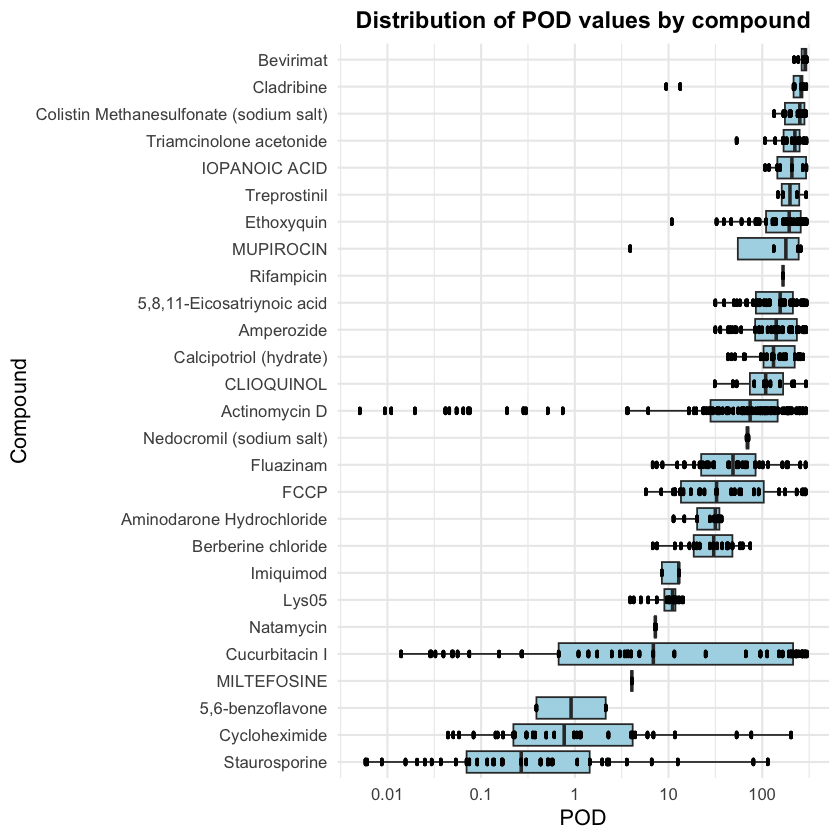

In [13]:
# boxplot of the BMD value per compound

library(ggplot2)

df_bmd <- final_df[!is.na(final_df$Concentration), ]


compound_order <- df_bmd %>%
  group_by(compound) %>%
  summarise(median_bmd = median(Concentration, na.rm = TRUE)) %>%
  arrange(median_bmd) %>%
  pull(compound)


df_bmd$compound <- factor(df_bmd$compound, levels = compound_order)


ggplot(df_bmd, aes(x = log10(Concentration), y = compound)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA, width = 0.8) +
  geom_jitter(width = 0, height = 0.1, alpha = 0.3, color = "black", size = 0.3) +
  labs(
    title = "Distribution of POD values by compound",
    x = "POD",
    y = "Compound"
  ) +
  scale_x_continuous(
    breaks = log10(c(0.001, 0.01, 0.1, 1, 10, 100)),
    labels = c("0.001", "0.01", "0.1", "1", "10", "100")
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )




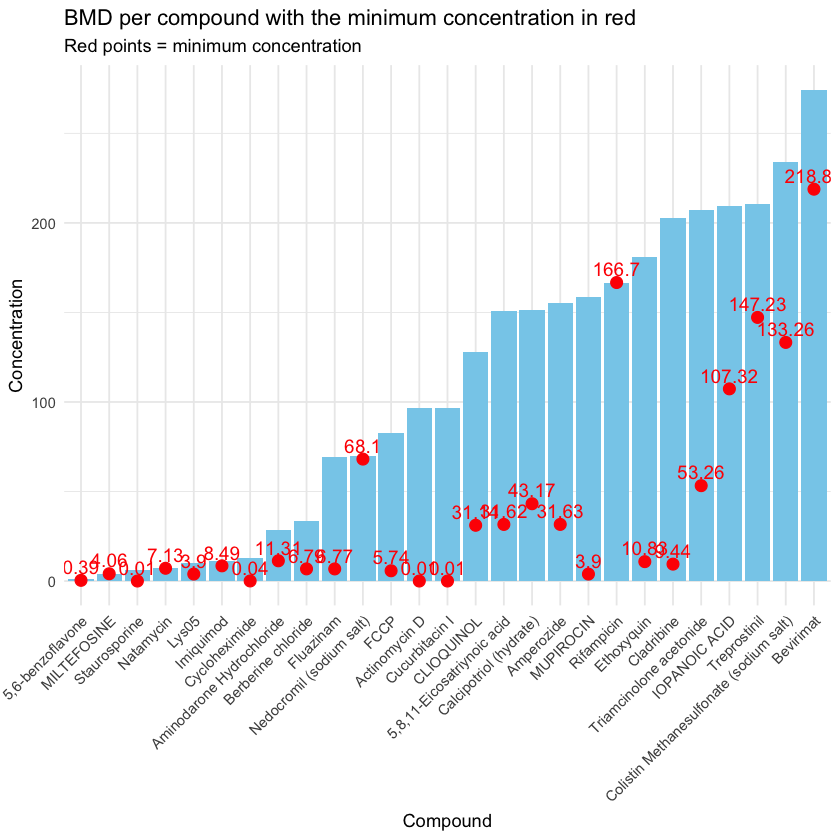

In [14]:
## Calculate the mean concentration for each compound

compound_categories <- df %>%
  select(Metadata_Compound, Metadata_Categories) %>%
  distinct() %>%
  rename(compound = Metadata_Compound, category_df = Metadata_Categories)

compound_summary <- final_df %>%
  group_by(compound) %>%
  summarise(
    mean_concentration = mean(Concentration, na.rm = TRUE),  
    min_concentration = min(Concentration, na.rm = TRUE),   
    nb_proteins = n_distinct(protein)
  ) %>%
  left_join(compound_categories, by = "compound")


p <- ggplot(compound_summary, aes(x = reorder(compound, mean_concentration), y = mean_concentration)) +
  geom_col(fill = "skyblue") + 
  geom_point(aes(y = min_concentration), color = "red", size = 3) +  
  geom_text(aes(y = min_concentration, label = round(min_concentration, 2)), 
            color = "red", vjust = -0.5, size = 4) + 
  #geom_text(aes(label = nb_proteins, y = mean_concentration + 5), size = 5, vjust = 0) +
  labs(title = "BMD per compound with the minimum concentration in red",
       x = "Compound",
       y = "Concentration",
       subtitle = "Red points = minimum concentration") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

print(p)


In [68]:
print(compound_summary)

# A tibble: 27 x 5
   compound         mean_concentration min_concentration nb_proteins category_df
   <chr>                         <dbl>             <dbl>       <int> <chr>      
 1 5,6-benzoflavone               1.26           0.389             2 Positive C~
 2 5,8,11-Eicosatr~             151.            31.6              33 Positive C~
 3 Actinomycin D                 96.8            0.00507         112 Positive C~
 4 Aminodarone Hyd~              28.2           11.3              11 Positive C~
 5 Amperozide                   155.            31.6              46 Positive C~
 6 Berberine chlor~              33.5            6.79             23 Positive C~
 7 Bevirimat                    274.           219.                8 Negative C~
 8 CLIOQUINOL                   128.            31.1              12 Negative C~
 9 Calcipotriol (h~             151.            43.2              25 Negative C~
10 Cladribine                   203.             9.44              9 Positive C~
# i 17 mo

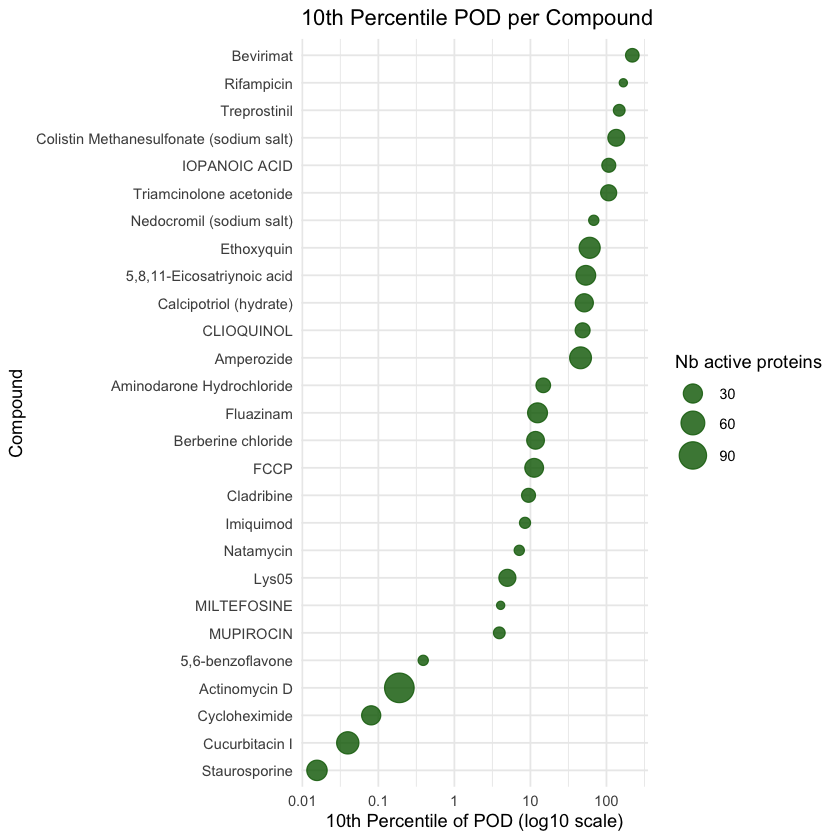

In [15]:
### Calculate the 10th percentile of BMD for each compound across all protein bmds 

compound_categories <- df %>%
  select(Metadata_Compound, Metadata_Categories) %>%
  distinct() %>%
  rename(compound = Metadata_Compound, category = Metadata_Categories)

pod_summary <- final_df %>%
  group_by(compound) %>%
  summarise(
    pod_10th_percentile = quantile(Concentration, probs = 0.10, na.rm = TRUE),
    nb_proteins = n_distinct(protein)
  ) %>%
  left_join(compound_categories, by = "compound") %>%
  arrange(desc(nb_proteins))


#print(pod_summary, n=Inf)

ggplot(pod_summary, aes(x = pod_10th_percentile, y = reorder(compound, pod_10th_percentile))) +
  geom_point(aes(size = nb_proteins), color = "darkgreen", alpha = 0.8) +
  scale_x_continuous(
    trans = "log10",
    breaks = c(0.001, 0.01, 0.1, 1, 10, 100),
    labels = c("0.001", "0.01", "0.1", "1", "10", "100")
  ) +
  scale_size_continuous(range = c(2, 8)) +  # ajuste la taille des points ici
  labs(title = "10th Percentile POD per Compound",
       x = "10th Percentile of POD (log10 scale)",
       y = "Compound",
       size = "Nb active proteins") +
  theme_minimal()



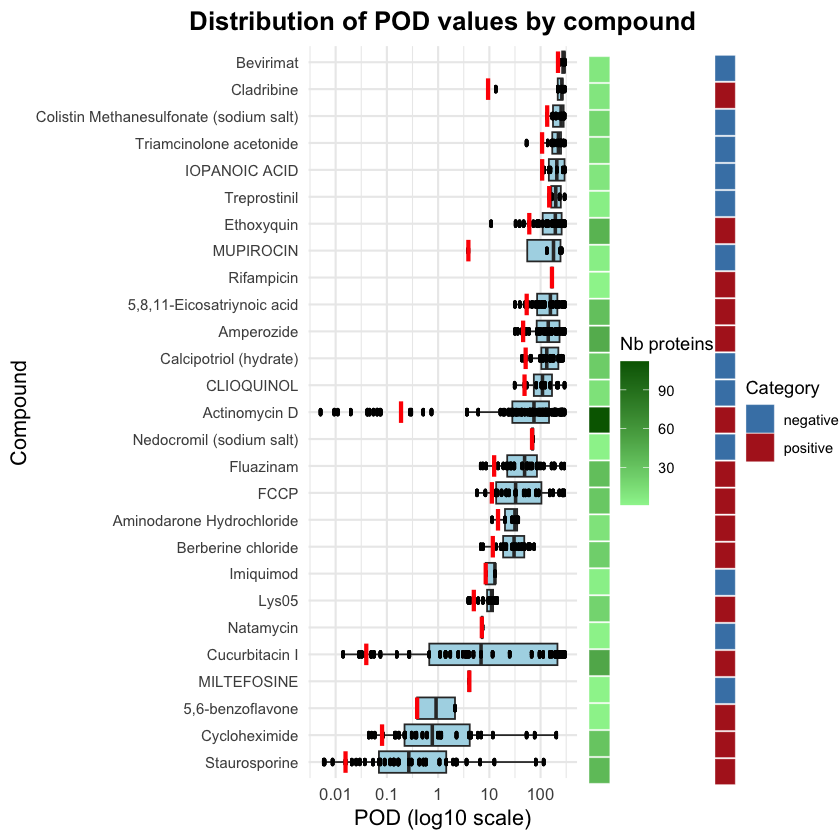

In [71]:
library(cowplot)
library(tidyr)


df_bmd <- final_df %>%
  filter(!is.na(Concentration), Concentration > 0)


compound_categories <- df %>%
  select(Metadata_Compound, Metadata_Categories) %>%
  distinct() %>%
  filter(!Metadata_Compound %in% c("Troglitazone", "PEMIROLAST POTASSIUM", 'DMSO')) %>%
  rename(compound = Metadata_Compound, category = Metadata_Categories) %>%
  mutate(category = case_when(
    grepl("Positive", category, ignore.case = TRUE) ~ "positive",
    grepl("Negative", category, ignore.case = TRUE) ~ "negative",
    TRUE ~ "other"
  ))


compound_order <- df_bmd %>%
  group_by(compound) %>%
  summarise(median_bmd = median(Concentration, na.rm = TRUE)) %>%
  right_join(compound_categories, by = "compound") %>%
  mutate(median_bmd = ifelse(is.na(median_bmd), Inf, median_bmd)) %>%
  arrange(median_bmd) %>%
  pull(compound)


pod_summary_raw <- final_df %>%
  filter(!is.na(Concentration), Concentration > 0) %>%
  group_by(compound) %>%
  summarise(
    pod_10th = quantile(Concentration, probs = 0.10, na.rm = TRUE),
    nb_proteins = n_distinct(protein)
  )

pod_summary <- compound_categories %>%
  left_join(pod_summary_raw, by = "compound") %>%
  mutate(category = replace_na(category, "other")) %>%
  mutate(
    compound = factor(compound, levels = compound_order),
    nb_proteins = replace_na(nb_proteins, 0)
  )


df_bmd$compound <- factor(df_bmd$compound, levels = compound_order)


p_main <- ggplot(df_bmd, aes(x = log10(Concentration), y = compound)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA, width = 0.8) +
  geom_jitter(width = 0, height = 0.1, alpha = 0.3, color = "black", size = 0.3) +
  geom_segment(data = pod_summary %>% filter(!is.na(pod_10th)), 
               aes(x = log10(pod_10th), xend = log10(pod_10th),
                   y = as.numeric(compound) - 0.4, 
                   yend = as.numeric(compound) + 0.4),
               color = "red", linewidth = 1.2) +
  scale_x_continuous(
    breaks = log10(c(0.001, 0.01, 0.1, 1, 10, 100)),
    labels = c("0.001", "0.01", "0.1", "1", "10", "100")
  ) +
  labs(
    title = "Distribution of POD values by compound",
    x = "POD (log10 scale)",
    y = "Compound"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.y = element_text(size = 9),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, face = "bold")
  )


p_proteins <- ggplot(pod_summary, aes(y = compound, x = 1, fill = nb_proteins)) +
  geom_tile(color = "white", height = 0.95) +
  scale_fill_gradient(name = "Nb proteins", low = "#9bf29b", high = "darkgreen") +
  theme_void() +
  theme(legend.position = "right") +
  coord_fixed(ratio = 1.3)


p_category <- ggplot(pod_summary, aes(y = compound, x = 1, fill = category)) +
  geom_tile(color = "white", height =0.95) +
  scale_fill_manual(
    name = "Category",
    values = c("positive" = "firebrick", "negative" = "steelblue", "other" = "grey70")
  ) +
  theme_void() +
  theme(legend.position = "right") +
  coord_fixed(ratio = 1.335)



final_plot <- plot_grid(
  p_main,
  plot_grid(p_proteins, p_category, ncol = 2, rel_widths = c(0.1, 0.1)),
  ncol = 2,
  rel_widths = c(0.7, 0.3)
)

print(final_plot)


In [ ]:
#write.csv(pod_summary, "/Users/grigoryanmariam/Downloads/proteomic_bmd_dose_results.csv", row.names = FALSE)


In [ ]:
## we now add the protein name to the all_bmd_pass dataframe and save it all in a csv file

## all done, just read the file bmd_pass_with_protein_name.csv

library(readr)

gene_info <- read_csv("../00.exploratory_analysis/outputs/gene_ids.csv")  

all_bmd_pass_neww <- all_bmd_pass %>%
  left_join(gene_info %>% select(uniprot_id, protein_name),
            by = c("gene.id" = "uniprot_id"))

all_bmd_pass_neww <- all_bmd_pass_neww %>%
  mutate(protein = ifelse(is.na(protein_name), gene.id, protein_name)) %>%
  select(-protein_name)  # on garde gene.id


#write.csv(all_bmd_pass_neww, "./outputs/bmd_pass_with_protein_name.csv", row.names = FALSE)

There are two protein ids: P01137.1 and P40933.1 that we don't have the name in gene_ids.csv. For those I put the name of proteins P01137 and P40933. 

In [ ]:
## load the parameters of the bmd curves with protein names, concentration and bmd values

all_bmd_pass_new <- read.csv("./outputs/bmd_pass_with_protein_name.csv", sep = ",")

In [ ]:
# not clustered heatmap of POD values using ggplot2

library(tidyverse)
library(pheatmap)
library(RColorBrewer)


compound_name <- unique(all_bmd_pass_new$compound_name)

active_prots <- all_bmd_pass_new %>%
  select(Protein = gene.id, Compound = compound_name, Concentration)

active_prots <- active_prots %>%
  filter(Compound %in% compound_name)

heatmap_data <- active_prots %>%
  pivot_wider(names_from = Compound, values_from = Concentration) %>%
  column_to_rownames("Protein")


max_value <- max(heatmap_data, na.rm = TRUE)


heatmap_data[is.na(heatmap_data)] <- max_value + 100


heatmap_long <- heatmap_data %>%
  rownames_to_column("Protein") %>%
  pivot_longer(cols = -Protein, names_to = "Compound", values_to = "POD")

p <- ggplot(heatmap_long, aes(x = Compound, y = Protein, fill = log10(POD))) + 
  geom_tile() + 
  theme_minimal() + 
  theme(
    axis.text.x = element_text(angle = 70, hjust = 1, size = 15),   
    axis.text.y = element_text(size = 12),  
    plot.title = element_text(size = 18),  
    axis.title.x = element_text(size = 16), 
    axis.title.y = element_text(size = 16)  
  ) +
  labs(title = "Heatmap of PODs") +
  scale_fill_gradientn(
    colors = rev(RColorBrewer::brewer.pal(16, "YlGnBu")),
    labels = c("0.001", "0.01", "0.1", "1", "10", "100")
  )


ggsave("heatmap_proteins.png", plot = p, width = 20, height = 30, dpi = 300) 


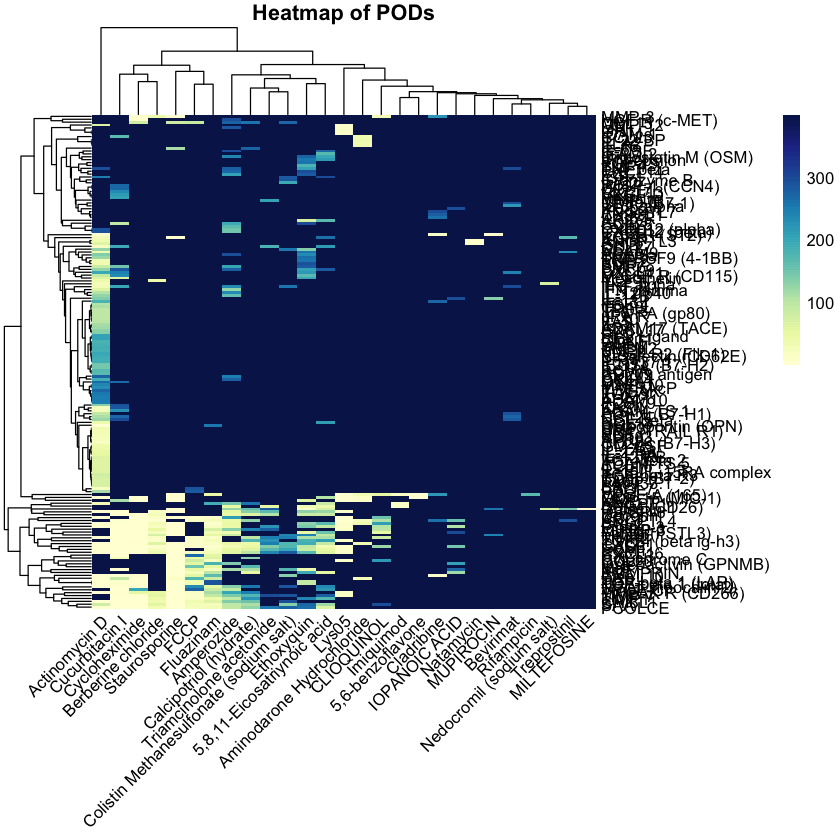

In [84]:
## clustered heatmap of POD values using pheatmap


library(pheatmap)

compound_name <- unique(all_bmd_pass_new$compound_name)
active_prots <- all_bmd_pass_new %>%
  select(Protein = protein, Compound = compound_name, Concentration)


active_prots <- active_prots %>%
  filter(Compound %in% compound_name)
heatmap_data <- active_prots %>%
  pivot_wider(names_from = Compound, values_from = Concentration) %>%
  column_to_rownames("Protein")


max_value <- max(heatmap_data, na.rm = TRUE)


heatmap_data[is.na(heatmap_data)] <- max_value + 100

heatmap_matrix <- as.matrix(heatmap_data)

pheatmap(
  heatmap_matrix,
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  display_numbers = FALSE,
  color = colorRampPalette(RColorBrewer::brewer.pal(9, "YlGnBu"))(100),
  main = "Heatmap of PODs",
  fontsize_row = 10,
  fontsize_col = 10,
  angle_col = 45,
  na_col = "grey90"
)

In [91]:
# saving the heatmap as a png file
heatmap_plot <- pheatmap(heatmap_matrix,
                         cluster_rows = TRUE,
                         cluster_cols = TRUE,
                         display_numbers = FALSE,
                         color = colorRampPalette(RColorBrewer::brewer.pal(9, "YlGnBu"))(100),
                         main = "Heatmap of POD values",
                         fontsize_row = 11,
                         fontsize_col = 14,
                         angle_col = 45,
                         na_col = "grey90",
                         silent = TRUE) 

png("./heatmap_protein_new.png", width = 15 * 1200, height = 26 * 1200, res = 1200)
grid::grid.newpage()
grid::grid.draw(heatmap_plot$gtable)
dev.off()


pdf 
  2

In [ ]:

#write.csv(final_df, "./outputs/results_POD_prot.csv", row.names = FALSE)

### Comparing the 10th Percentile of protein PODs and MD of CP data


In [21]:

library(patchwork)

## loading the results of MD PODs

final_df_md <- read.csv("./outputs/results_MD_CP_data.csv", header = TRUE)

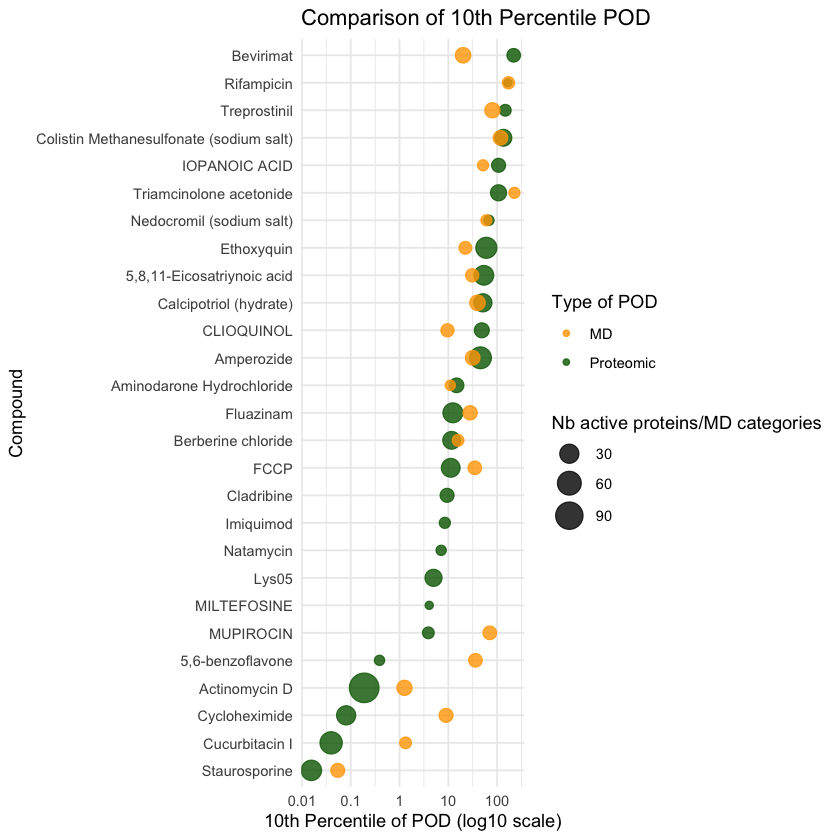

In [27]:
#
pod_summary_proteins <- final_df %>%
  group_by(compound = compound) %>%
  summarise(
    pod_10th_percentile = quantile(Concentration, probs = 0.10, na.rm = TRUE),
    nb_proteins = n_distinct(protein)
  ) %>%
  mutate(type = "Proteomic")


pod_summary_md <- final_df_md %>%
  group_by(compound = compound) %>%
  summarise(
    pod_10th_percentile = quantile(Concentration, probs = 0.10, na.rm = TRUE),
    nb_proteins = n_distinct(protein)
  ) %>%
  mutate(type = "MD")

pod_summary_combined <- bind_rows(pod_summary_proteins, pod_summary_md)

compound_order <- pod_summary_combined %>%
  filter(type == "Proteomic") %>%
  arrange(pod_10th_percentile) %>%
  pull(compound)


ggplot(pod_summary_combined, aes(x = pod_10th_percentile, y = factor(compound, levels = compound_order))) +
  geom_point(aes(color = type, size = nb_proteins), alpha = 0.8) +
  scale_x_continuous(
    trans = "log10",
    breaks = c(0.001, 0.01, 0.1, 1, 10, 100),
    labels = c("0.001", "0.01", "0.1", "1", "10", "100")
  ) +
  scale_color_manual(values = c("Proteomic" = "darkgreen", "MD" = "orange")) +
  scale_size_continuous(range = c(2, 8)) +
  labs(
    title = "Comparison of 10th Percentile POD",
    x = "10th Percentile of POD (log10 scale)",
    y = "Compound",
    color = "Type of POD",
    size = "Nb active proteins/MD categories"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


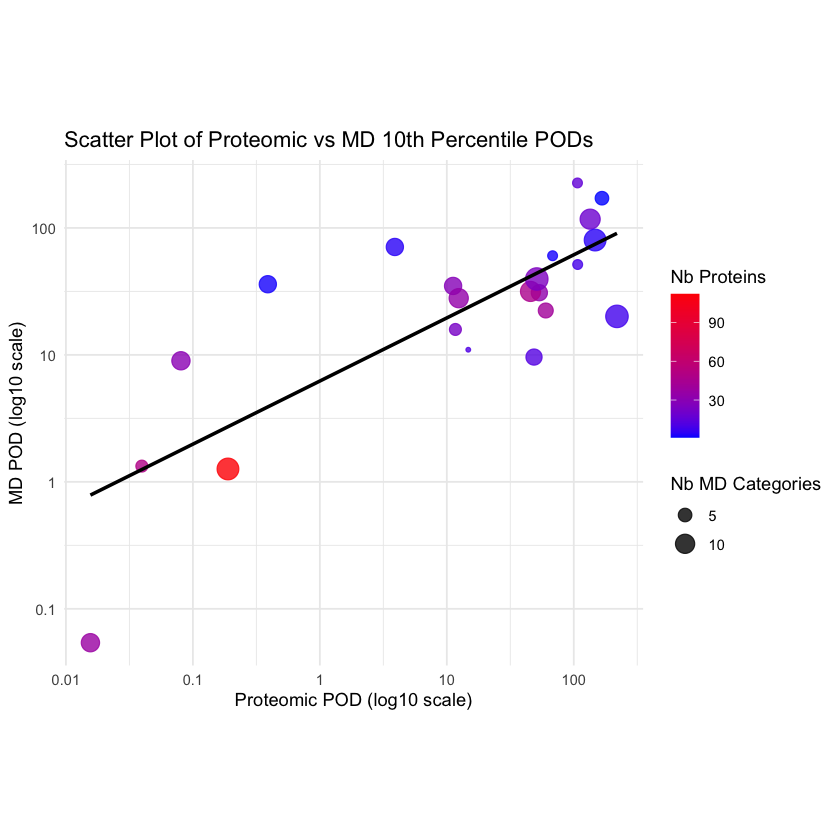

In [ ]:
# Scatter plot comparing proteomic and MD 10th percentile PODs with linear regression line


pod_summary_md_renamed <- pod_summary_md %>%
  select(compound, pod_10th_percentile, nb_proteins) %>%
  rename(
    pod_10th_percentile_MD = pod_10th_percentile,
    nb_category_MD = nb_proteins 
  )



merged_table <- pod_summary_proteins %>%
  inner_join(pod_summary_md_renamed, by = "compound")



ggplot(merged_table, aes(x = pod_10th_percentile, y = pod_10th_percentile_MD)) +
    geom_point(aes(color = nb_proteins, size = nb_category_MD), alpha = 0.8) +
    geom_smooth(method = "lm", color = "black", se = FALSE) +
    scale_x_continuous(
        trans = "log10",
        breaks = c(0.001, 0.01, 0.1, 1, 10, 100),
        labels = c("0.001", "0.01", "0.1", "1", "10", "100")
    ) +
    scale_y_continuous(
        trans = "log10",
        breaks = c(0.001, 0.01, 0.1, 1, 10, 100),
        labels = c("0.001", "0.01", "0.1", "1", "10", "100")
    ) +
    scale_color_gradient(low = "blue", high = "red") +
    labs(
        title = "Scatter Plot of Proteomic vs MD 10th Percentile PODs",
        x = "Proteomic POD (log10 scale)",
        y = "MD POD (log10 scale)",
        color = "Nb Proteins",
        size = "Nb MD Categories"
    ) +
    theme_minimal() +
    coord_fixed()  

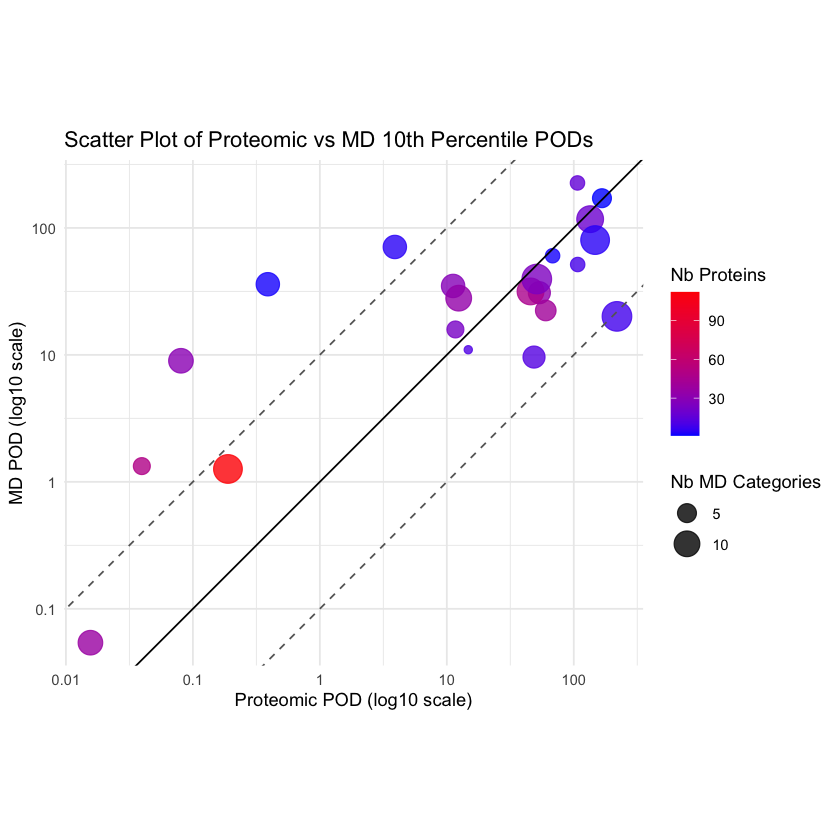

In [59]:
ggplot(merged_table, aes(x = pod_10th_percentile, y = pod_10th_percentile_MD)) +
  geom_point(aes(color = nb_proteins, size = nb_category_MD), alpha = 0.8) +
  
  # Ligne 1:1
  geom_abline(slope = 1, intercept = 0, color = "black") +
  
  # Ligne y = 10x
  geom_abline(slope = 1, intercept = log10(10), linetype = "dashed", color = "gray40") +

  geom_abline(slope = 1, intercept = - log10(10), linetype = "dashed", color = "gray40") +
  
  scale_x_continuous(
    trans = "log10",
    breaks = c(0.001, 0.01, 0.1, 1, 10, 100),
    labels = c("0.001", "0.01", "0.1", "1", "10", "100")
  ) +
  scale_y_continuous(
    trans = "log10",
    breaks = c(0.001, 0.01, 0.1, 1, 10, 100),
    labels = c("0.001", "0.01", "0.1", "1", "10", "100")
  ) +
  scale_color_gradient(low = "blue", high = "red") +
  scale_size_continuous(range = c(2, 8)) +
  labs(
    title = "Scatter Plot of Proteomic vs MD 10th Percentile PODs",
    x = "Proteomic POD (log10 scale)",
    y = "MD POD (log10 scale)",
    color = "Nb Proteins",
    size = "Nb MD Categories"
  ) +
  theme_minimal() +
  coord_fixed()


In [58]:
correlation_test <- cor.test(merged_table$pod_10th_percentile, merged_table$pod_10th_percentile_MD, use = "complete.obs", method = "pearson")
correlation <- correlation_test$estimate
p_value <- correlation_test$p.value

print(paste("Correlation between Proteomic and MD 10th Percentile PODs:", correlation))
print(paste("P-value of the correlation:", p_value))

[1] "Correlation between Proteomic and MD 10th Percentile PODs: 0.542829261763974"
[1] "P-value of the correlation: 0.00904274962782758"


In the context of our data, the 10th percentile PODs from proteomic data and MD data are moderately related but there is still variability that is not explained by the correlation.